In [1]:
import os
import pybullet_envs
import numpy as np
import matplotlib.pyplot as plt
# import panda_gym # Not in requirements, required for panda envs, get latest from here: https://github.com/qgallouedec/panda-gym , don't use version from pypy 

from seagul.zoo3_utils import load_zoo_agent, ALGOS

#agent_dir = os.path.abspath('') + "/keep_agents/bullet_works_rewards/" # Bullet envs with mdim and cdim rewards
model_dir = os.path.abspath('') + "/keep_agents/default_post_01_001/" # Bullet with no extra reward, just policy refinement with ARS  

In [2]:
# Iterate through save directory and load everything

model_dict = {}
env_dict = {}

for algo_file in os.scandir(model_dir):
    algo_dir = algo_file.path
    algo = algo_dir.split("/")[-1]
    model_dict[algo] = {}
    env_dict[algo] = {}
    for env_file in os.scandir(algo_dir):
        env_dir = env_file.path
        env_name = env_dir.split("/")[-1]
        model_dict[algo][env_name] = {}
        env_dict[algo][env_name] = {}
        env, original_model = load_zoo_agent(env_name, algo)
        env_dict[algo][env_name] = env
        model_dict[algo][env_name]['original'] = original_model
        for pkl_file in os.scandir(env_dir):
            post_name = pkl_file.path.split("/")[-1].split(".")[0]
            model_dict[algo][env_name][post_name] = ALGOS[algo].load(pkl_file.path, env=env, device='cpu')

/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/ppo/Walker2DBulletEnv-v0_1/Walker2DBulletEnv-v0
Loading running average
with params: {'norm_obs': True, 'norm_reward': True}
/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/ppo/HalfCheetahBulletEnv-v0_1/HalfCheetahBulletEnv-v0
Loading running average
with params: {'norm_obs': True, 'norm_reward': True}
/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/ppo/AntBulletEnv-v0_1/AntBulletEnv-v0
Loading running average
with params: {'norm_obs': True, 'norm_reward': True}


/home/sgillen/anaconda3/envs/baselines/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/ppo/ReacherBulletEnv-v0_1/ReacherBulletEnv-v0
Loading running average
with params: {'norm_obs': True, 'norm_reward': True}
/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/ppo/HopperBulletEnv-v0_1/HopperBulletEnv-v0
Loading running average
with params: {'norm_obs': True, 'norm_reward': True}
/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/sac/Walker2DBulletEnv-v0_1/Walker2DBulletEnv-v0
/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/sac/HalfCheetahBulletEnv-v0_1/HalfCheetahBulletEnv-v0
/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/sac/AntBulletEnv-v0_1/AntBulletEnv-v0
/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/sac/ReacherBulletEnv-v0_1/ReacherBulletEnv-v0
/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/sac/HopperBulletEnv-v0_1/HopperBulletEnv-v0
/home/sgillen/work/external/rl-baselines3-zoo/rl-trained-agents/tqc/Walker2DBu

In [3]:
algo_list = list(model_dict.keys())
env_list = list(model_dict[algo_list[0]].keys())
post_list = list(model_dict[algo_list[0]][env_list[0]].keys())

print(algo_list) # Original Algorithm
print(env_list) # Environment

# Postprocessor, autogenerated names. "original" means the original agent from zoo without additional training, "postprocess_default" means just ARS with not extra reward.
# Any other name is some new reward functio 
print(post_list)

['ppo', 'sac', 'tqc', 'td3']
['Walker2DBulletEnv-v0', 'HalfCheetahBulletEnv-v0', 'AntBulletEnv-v0', 'ReacherBulletEnv-v0', 'HopperBulletEnv-v0']
['original', 'postprocess_default']


In [4]:
env = env_dict['ppo']['Walker2DBulletEnv-v0']
model = model_dict['ppo']['Walker2DBulletEnv-v0'][post_list[0]]

In [5]:
#from seagul.zoo3_utils import do_rollout_stable
def do_rollout_mine(env, model, render=False, render_wait=0.01, seed=None):
    state_list = []
    act_list = []
    reward_list = []

    if seed:
        env.seed(seed)
    obs = env.reset()
    done = False

    while not done:
        # Add push or something else here 

        state_list.append(np.copy(obs))
        

        actions,_ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(actions)
        
        # Or maybe here

    
        if render:
            env.render()
            time.sleep(render_wait)
        
        act_list.append(np.copy(actions))
        reward_list.append(reward)

    state_arr = np.stack(state_list).squeeze()
    act_arr = np.stack(act_list).squeeze()


    return state_arr, act_arr, reward_list, info


In [6]:
obs,act,rew,info = do_rollout_mine(env, model)

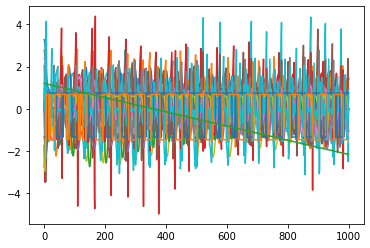

In [7]:
plt.plot(obs);